In [18]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
# Load and Explore the Dataset
# Load the dataset
data = pd.read_csv("fetal_health.csv", sep=",")

# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(data.head())

# Display dataset information
print("\nDataset Info:")
print(data.info())

# Check for missing values
print("\nMissing Values in Each Column:")
print(data.isnull().sum())

First 5 rows of the dataset:
   baseline value  accelerations  fetal_movement  uterine_contractions  \
0           120.0          0.000             0.0                 0.000   
1           132.0          0.006             0.0                 0.006   
2           133.0          0.003             0.0                 0.008   
3           134.0          0.003             0.0                 0.008   
4           132.0          0.007             0.0                 0.008   

   light_decelerations  severe_decelerations  prolongued_decelerations  \
0                0.000                   0.0                       0.0   
1                0.003                   0.0                       0.0   
2                0.003                   0.0                       0.0   
3                0.003                   0.0                       0.0   
4                0.000                   0.0                       0.0   

   abnormal_short_term_variability  mean_value_of_short_term_variability  \
0    

In [20]:
# Data Preprocessing
# Separate features and target variable
X = data.drop(columns=["fetal_health"])
y = data["fetal_health"]

# Normalize the feature data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [21]:
# Instantiate the KNN model with default parameters
knn = KNeighborsClassifier()

# Step 2: Train the KNN model
knn.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = knn.predict(X_test)

KNN Classification Report:
               precision    recall  f1-score   support

         1.0       0.94      0.97      0.96       333
         2.0       0.81      0.69      0.75        64
         3.0       0.79      0.76      0.77        29

    accuracy                           0.92       426
   macro avg       0.85      0.81      0.82       426
weighted avg       0.91      0.92      0.91       426

KNN Accuracy Score: 0.9154929577464789


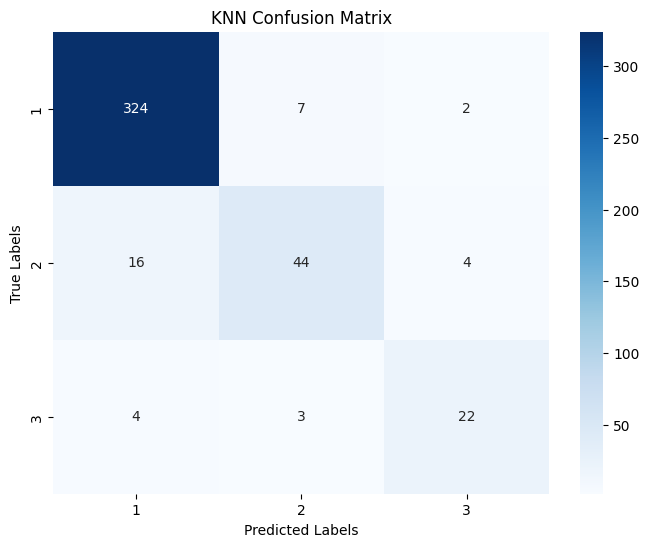

In [22]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

# Print the accuracy score
print("KNN Accuracy Score:", accuracy_score(y_test, y_pred))

# Show the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [23]:
param_grid = {
    'n_neighbors': range(1, 21),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
    'p': [1, 2],
}

# Create a GridSearchCV object
grid_search = GridSearchCV(
    estimator=KNeighborsClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1
)

# Perform the grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and the best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)



Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Cross-Validated Accuracy: 0.9099999999999999


In [24]:
knn = KNeighborsClassifier(
    metric='manhattan',
    n_neighbors=3,
    p=1,
    weights='distance',
)

# Step 2: Train the KNN model
knn.fit(X_train, y_train)

# Step 3: Make predictions
y_pred = knn.predict(X_test)

KNN Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       333
         2.0       0.81      0.73      0.77        64
         3.0       0.86      0.86      0.86        29

    accuracy                           0.93       426
   macro avg       0.88      0.86      0.86       426
weighted avg       0.93      0.93      0.93       426

KNN Accuracy Score: 0.9272300469483568


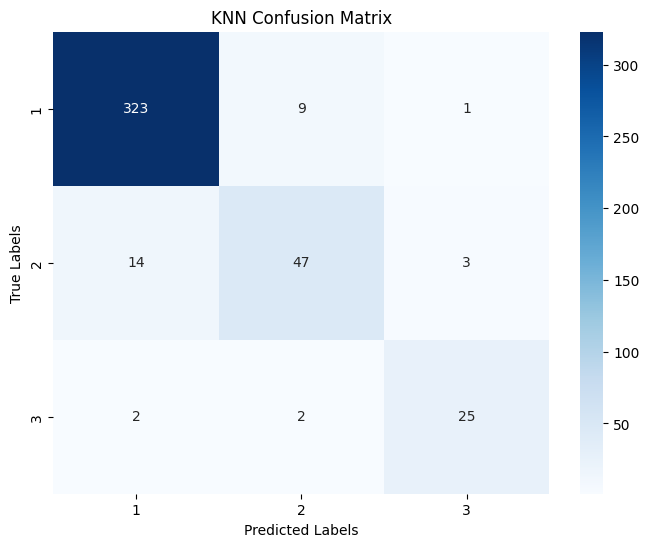

In [25]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print("KNN Classification Report:\n", classification_report(y_test, y_pred))

# Print the accuracy score
print("KNN Accuracy Score:", accuracy_score(y_test, y_pred))

# Show the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [26]:
# Step 1: Create the Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Step 2: Train the Random Forest model
rf.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_rf = rf.predict(X_test)

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       333
         2.0       0.81      0.73      0.77        64
         3.0       0.86      0.86      0.86        29

    accuracy                           0.93       426
   macro avg       0.88      0.86      0.86       426
weighted avg       0.93      0.93      0.93       426

Random Forest Accuracy Score: 0.9272300469483568


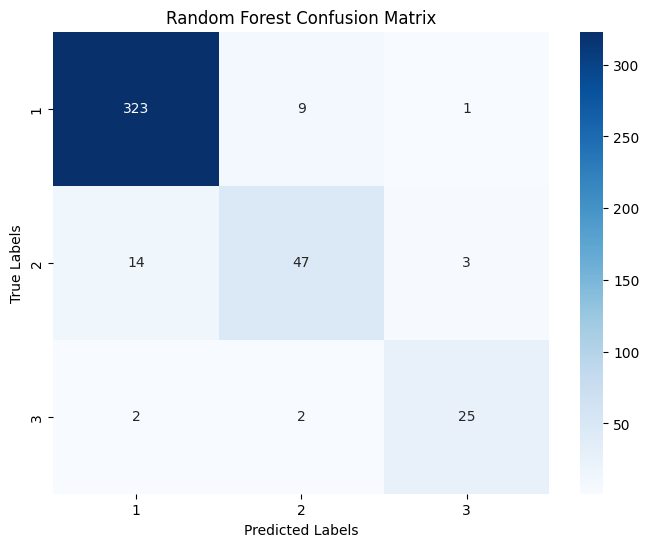

In [27]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

# Print the accuracy score
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred))

# Show the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [28]:
# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200, 300],             # Number of trees in the forest
    'criterion': ['gini', 'entropy', 'log_loss'],    # Splitting criteria
    'max_depth': [None, 10, 20, 30],                 # Maximum depth of trees
    'min_samples_split': [2, 5, 10],                # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                  # Minimum number of samples required to be at a leaf node
    'max_features': ['sqrt', 'log2', None],         # Number of features to consider for best split
    'bootstrap': [True, False],                     # Whether bootstrap samples are used when building trees
    'random_state': [42]                            # Ensure reproducibility
}

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1  # Use all available cores
)

# Perform the grid search
grid_search_rf.fit(X_train, y_train)

# Print the best parameters and the best accuracy
print("Best Parameters:", grid_search_rf.best_params_)
print("Best Cross-Validated Accuracy:", grid_search_rf.best_score_)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits
Best Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 42}
Best Cross-Validated Accuracy: 0.9452941176470588


In [29]:
# Step 1: Create the Random Forest Classifier
rf = RandomForestClassifier(
    bootstrap = False, 
    criterion = 'entropy',
    max_depth = None,
    max_features = 'sqrt',
    min_samples_leaf = 1,
    min_samples_split = 10,
    n_estimators = 50,
    random_state = 42
)

# Step 2: Train the Random Forest model
rf.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_rf = rf.predict(X_test)

Random Forest Classification Report:
               precision    recall  f1-score   support

         1.0       0.95      0.97      0.96       333
         2.0       0.81      0.73      0.77        64
         3.0       0.86      0.86      0.86        29

    accuracy                           0.93       426
   macro avg       0.88      0.86      0.86       426
weighted avg       0.93      0.93      0.93       426

Random Forest Accuracy Score: 0.9272300469483568


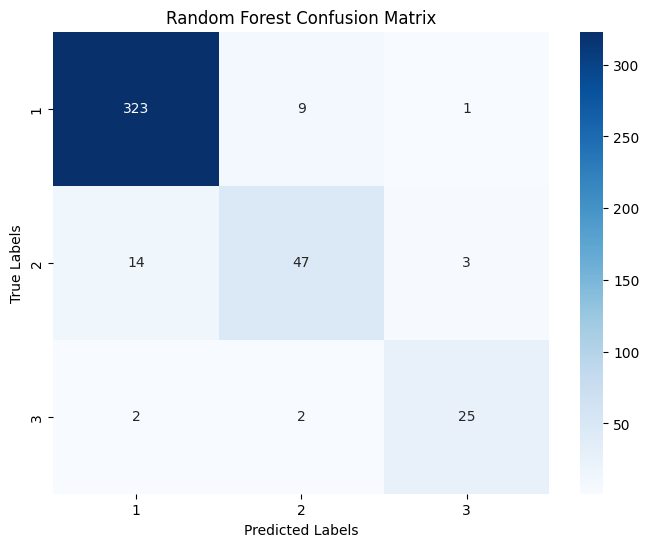

In [30]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the classification report
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))

# Print the accuracy score
print("Random Forest Accuracy Score:", accuracy_score(y_test, y_pred))

# Show the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()